<a href="https://colab.research.google.com/github/ysun-8/QNC_NGG_2022/blob/main/Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

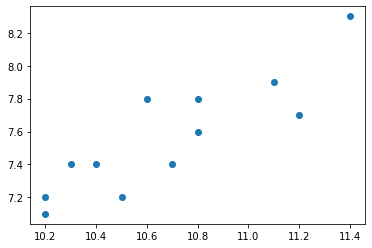

In [2]:
wing = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

plt.scatter(wing, tail)
plt.show()

# wing and tail appear to look related

In [3]:
# calculating r(X,Y) and r(Y,X)
r = np.mean([(wing[i]-np.mean(wing))*(tail[i]-np.mean(tail)) for i in range(len(wing))])/np.std(wing)/np.std(tail)

np.corrcoef(wing, tail)
# these are returning the same value of 0.870

array([[1.        , 0.87035456],
       [0.87035456, 1.        ]])

In [4]:
SE = np.sqrt((1-np.square(r))/(len(wing) - 2))

confidence = [r - SE * 1.96, r + SE * 1.96]

confidence

[0.5651460337155023, 1.1755630888961432]

In [9]:
# hypothesis testing

# yes, it should be considered significant at the p = 0.05 level since the 95% confidence interval above does not contain 0
# alternatively, we compute the t-statistic as below
t = r/SE
p = 2.*(1-st.t.cdf(t, len(wing)-1))

p

0.00016289879335062984

In [12]:
z_r = 0.5 * np.log((1+r)/(1-r))
z_rs = 0.5 * np.log((1+0.75)/(1-0.75))

lamb = (z_r - z_rs)/(np.sqrt(1/(len(wing)-3)))

p = 2.*(1-st.t.cdf(lamb, len(wing)-1))

p

# not significantly different!

0.30123232892867957

In [14]:
from statsmodels.stats.power import TTestIndPower

power = 0.8

obj = TTestIndPower()
number_needed = obj.solve_power(effect_size = 0.5, alpha = 0.05, power = power)

number_needed
# is this the correct effect size?

63.765611775409525